<a href="https://colab.research.google.com/github/ydev365/linear-algebra/blob/main/linear_algebra_class_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch [100/1000], cost: 0.9357
Epoch [200/1000], cost: 0.6942
Epoch [300/1000], cost: 0.5158
Epoch [400/1000], cost: 0.4215
Epoch [500/1000], cost: 0.3598
Epoch [600/1000], cost: 0.3122
Epoch [700/1000], cost: 0.2734
Epoch [800/1000], cost: 0.2415
Epoch [900/1000], cost: 0.2154
Epoch [1000/1000], cost: 0.1942


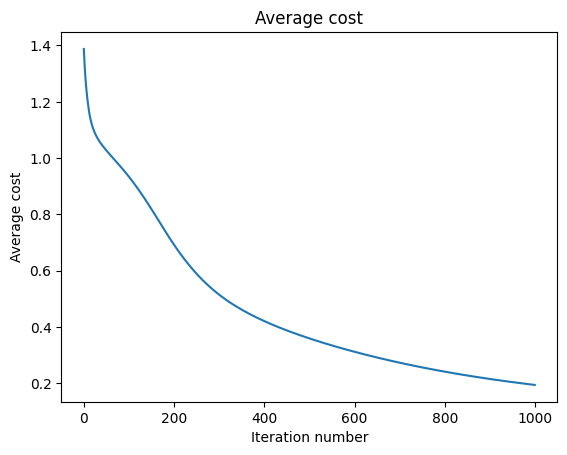

Accuracy: 98.00%


In [12]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# 파일 경로 지정
file_path = '/Iris.csv'  # 업로드한 파일의 경로에 따라 수정

# 파일 불러오기
data = pd.read_csv(file_path)



# 필요한 열 추출하여 넘파이 배열로 변환
X = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values
y = data['Species'].values





# 딕셔너리를 사용하여 각 문자를 대응하는 숫자로 매핑
mapping = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}

# 매핑된 값을 리스트에 적용
y = [mapping[char] for char in y]

X = np.array(X)

# 라벨 (0: Setosa, 1: Versicolor, 2: Virginica)
y = np.array(y)

# 데이터를 PyTorch 텐서로 변환
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.int64)

# 신경망 모델 정의
class IrisClassifier(nn.Module):
    def __init__(self):
        super(IrisClassifier, self).__init__()
        self.fc1 = nn.Linear(4, 10)  # 입력층에서 은닉층으로의 연결
        self.fc2 = nn.Linear(10, 3)  # 은닉층에서 출력층으로의 연결

    def forward(self, x):
        x = torch.relu(self.fc1(x))  # ReLU 활성화 함수를 사용한 은닉층
        x = self.fc2(x)  # 출력층
        return x

# 모델 생성
model = IrisClassifier()

# 손실 함수와 옵티마이저 정의
criterion = nn.CrossEntropyLoss()  # 분류 문제이므로 CrossEntropyLoss 사용
optimizer = optim.SGD(model.parameters(), lr=0.01)  # SGD 옵티마이저 사용
list_average_cost=[]
# 학습
epochs = 1000
for epoch in range(epochs):
    optimizer.zero_grad()  # 변화도 초기화
    outputs = model(X)  # 순전파
    loss = criterion(outputs, y)  # 손실 계산
    loss.backward()  # 역전파
    optimizer.step()  # 매개변수 업데이트
    list_average_cost.append(loss.item())
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], cost: {loss.item():.4f}')

Figure,ax=plt.subplots(1,1)
ax.title.set_text('Average cost')
ax.plot(list_average_cost)
ax.set_ylabel('Average cost')
ax.set_xlabel('Iteration number')
plt.show()

# 학습된 모델 테스트
with torch.no_grad():
    outputs = model(X)
    _, predicted = torch.max(outputs, 1)
    accuracy = (predicted == y).sum().item() / len(y)
    print(f'Accuracy: {accuracy * 100:.2f}%')
